<a href="https://colab.research.google.com/github/ast-abo/ShotTracker/blob/Export-Model/ShotTrackerModelTraingScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install roboflow
from roboflow import Roboflow

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/107.7 GB disk)


In [6]:
import os
import shutil

!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://hc-cdn.hel1.your-objectstorage.com/s/v3/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpeg' save=True

# Define paths
OutputDirectory = "runs/detect/predict"
OldFileName = "9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpg"  # The original file name
NewFileName = "ball.jpg"  # The desired new name

# Rename the file
OldFilePath = os.path.join(OutputDirectory, OldFileName)
NewFilePath = os.path.join(OutputDirectory, NewFileName)
print(OldFilePath)


try:
    shutil.move(OldFilePath, NewFilePath)
    print(f"File renamed to {NewFilePath}")
except Exception as e:
    print(f"Error renaming file: {e}")

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://hc-cdn.hel1.your-objectstorage.com/s/v3/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpeg locally at 9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpeg
image 1/1 /content/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpeg: 640x448 1 person, 1 clock, 383.5ms
Speed: 16.0ms preprocess, 383.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
runs/detect/predict/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpg
Error renaming file: [Errno 2] No such file or directory: 'runs/detect/predict/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpg'


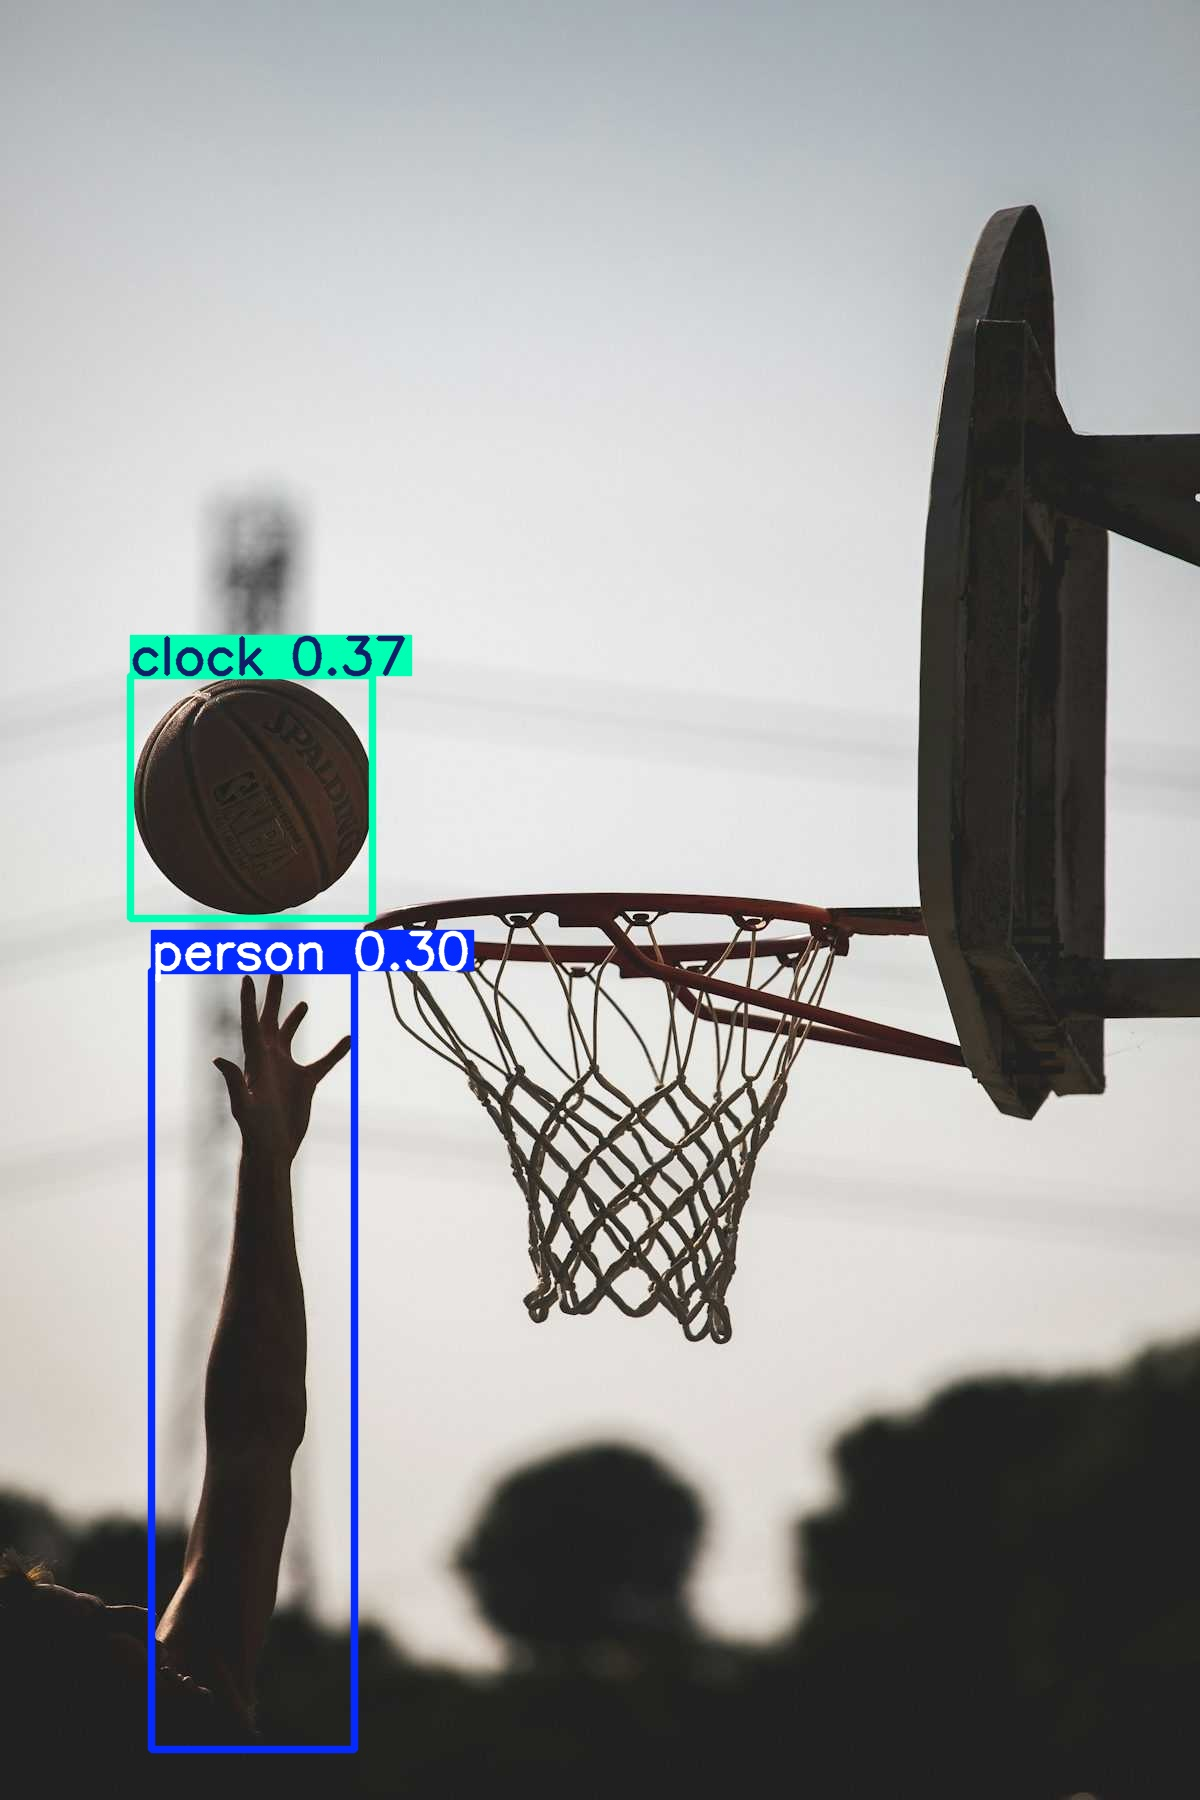

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/ball.jpg', width=600)

In [8]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://hc-cdn.hel1.your-objectstorage.com/s/v3/9b5aca918f91e5abfa21b0457b0022116ff32412_photo-1629901925121-8a141c2a42f4.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x448 1 person, 1 clock, 331.6ms
Speed: 7.3ms preprocess, 331.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


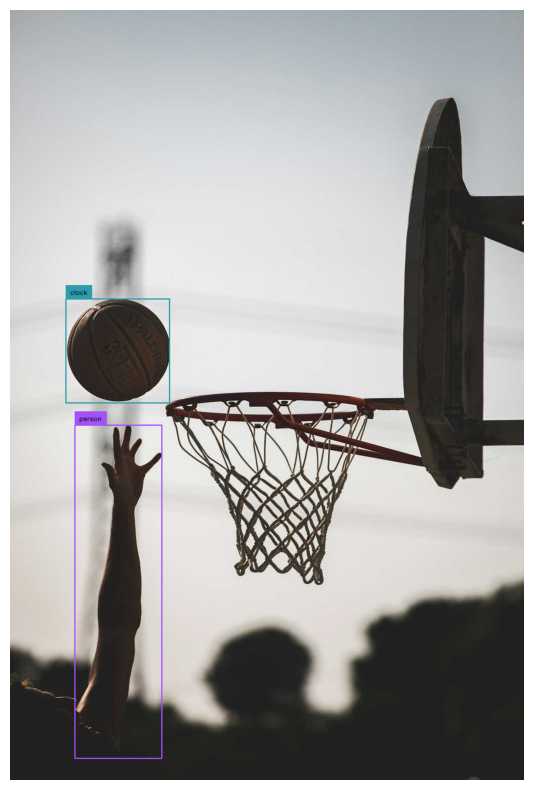

In [9]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)


sv.plot_image(annotated_image, size=(10, 10))

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="NLWnQPigGaE8pl98gFYh")
project = rf.workspace("icespace").project("shot-tracker-ik6bf")
version = project.version(2)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.120 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Shot-Tracker-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

In [12]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.csv
confusion_matrix_normalized.png			    results.png
confusion_matrix.png				    roboflow_deploy.zip
events.out.tfevents.1745962795.ca084f33952d.2023.0  state_dict.pt
F1_curve.png					    train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
model_artifacts.json				    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights
R_curve.png


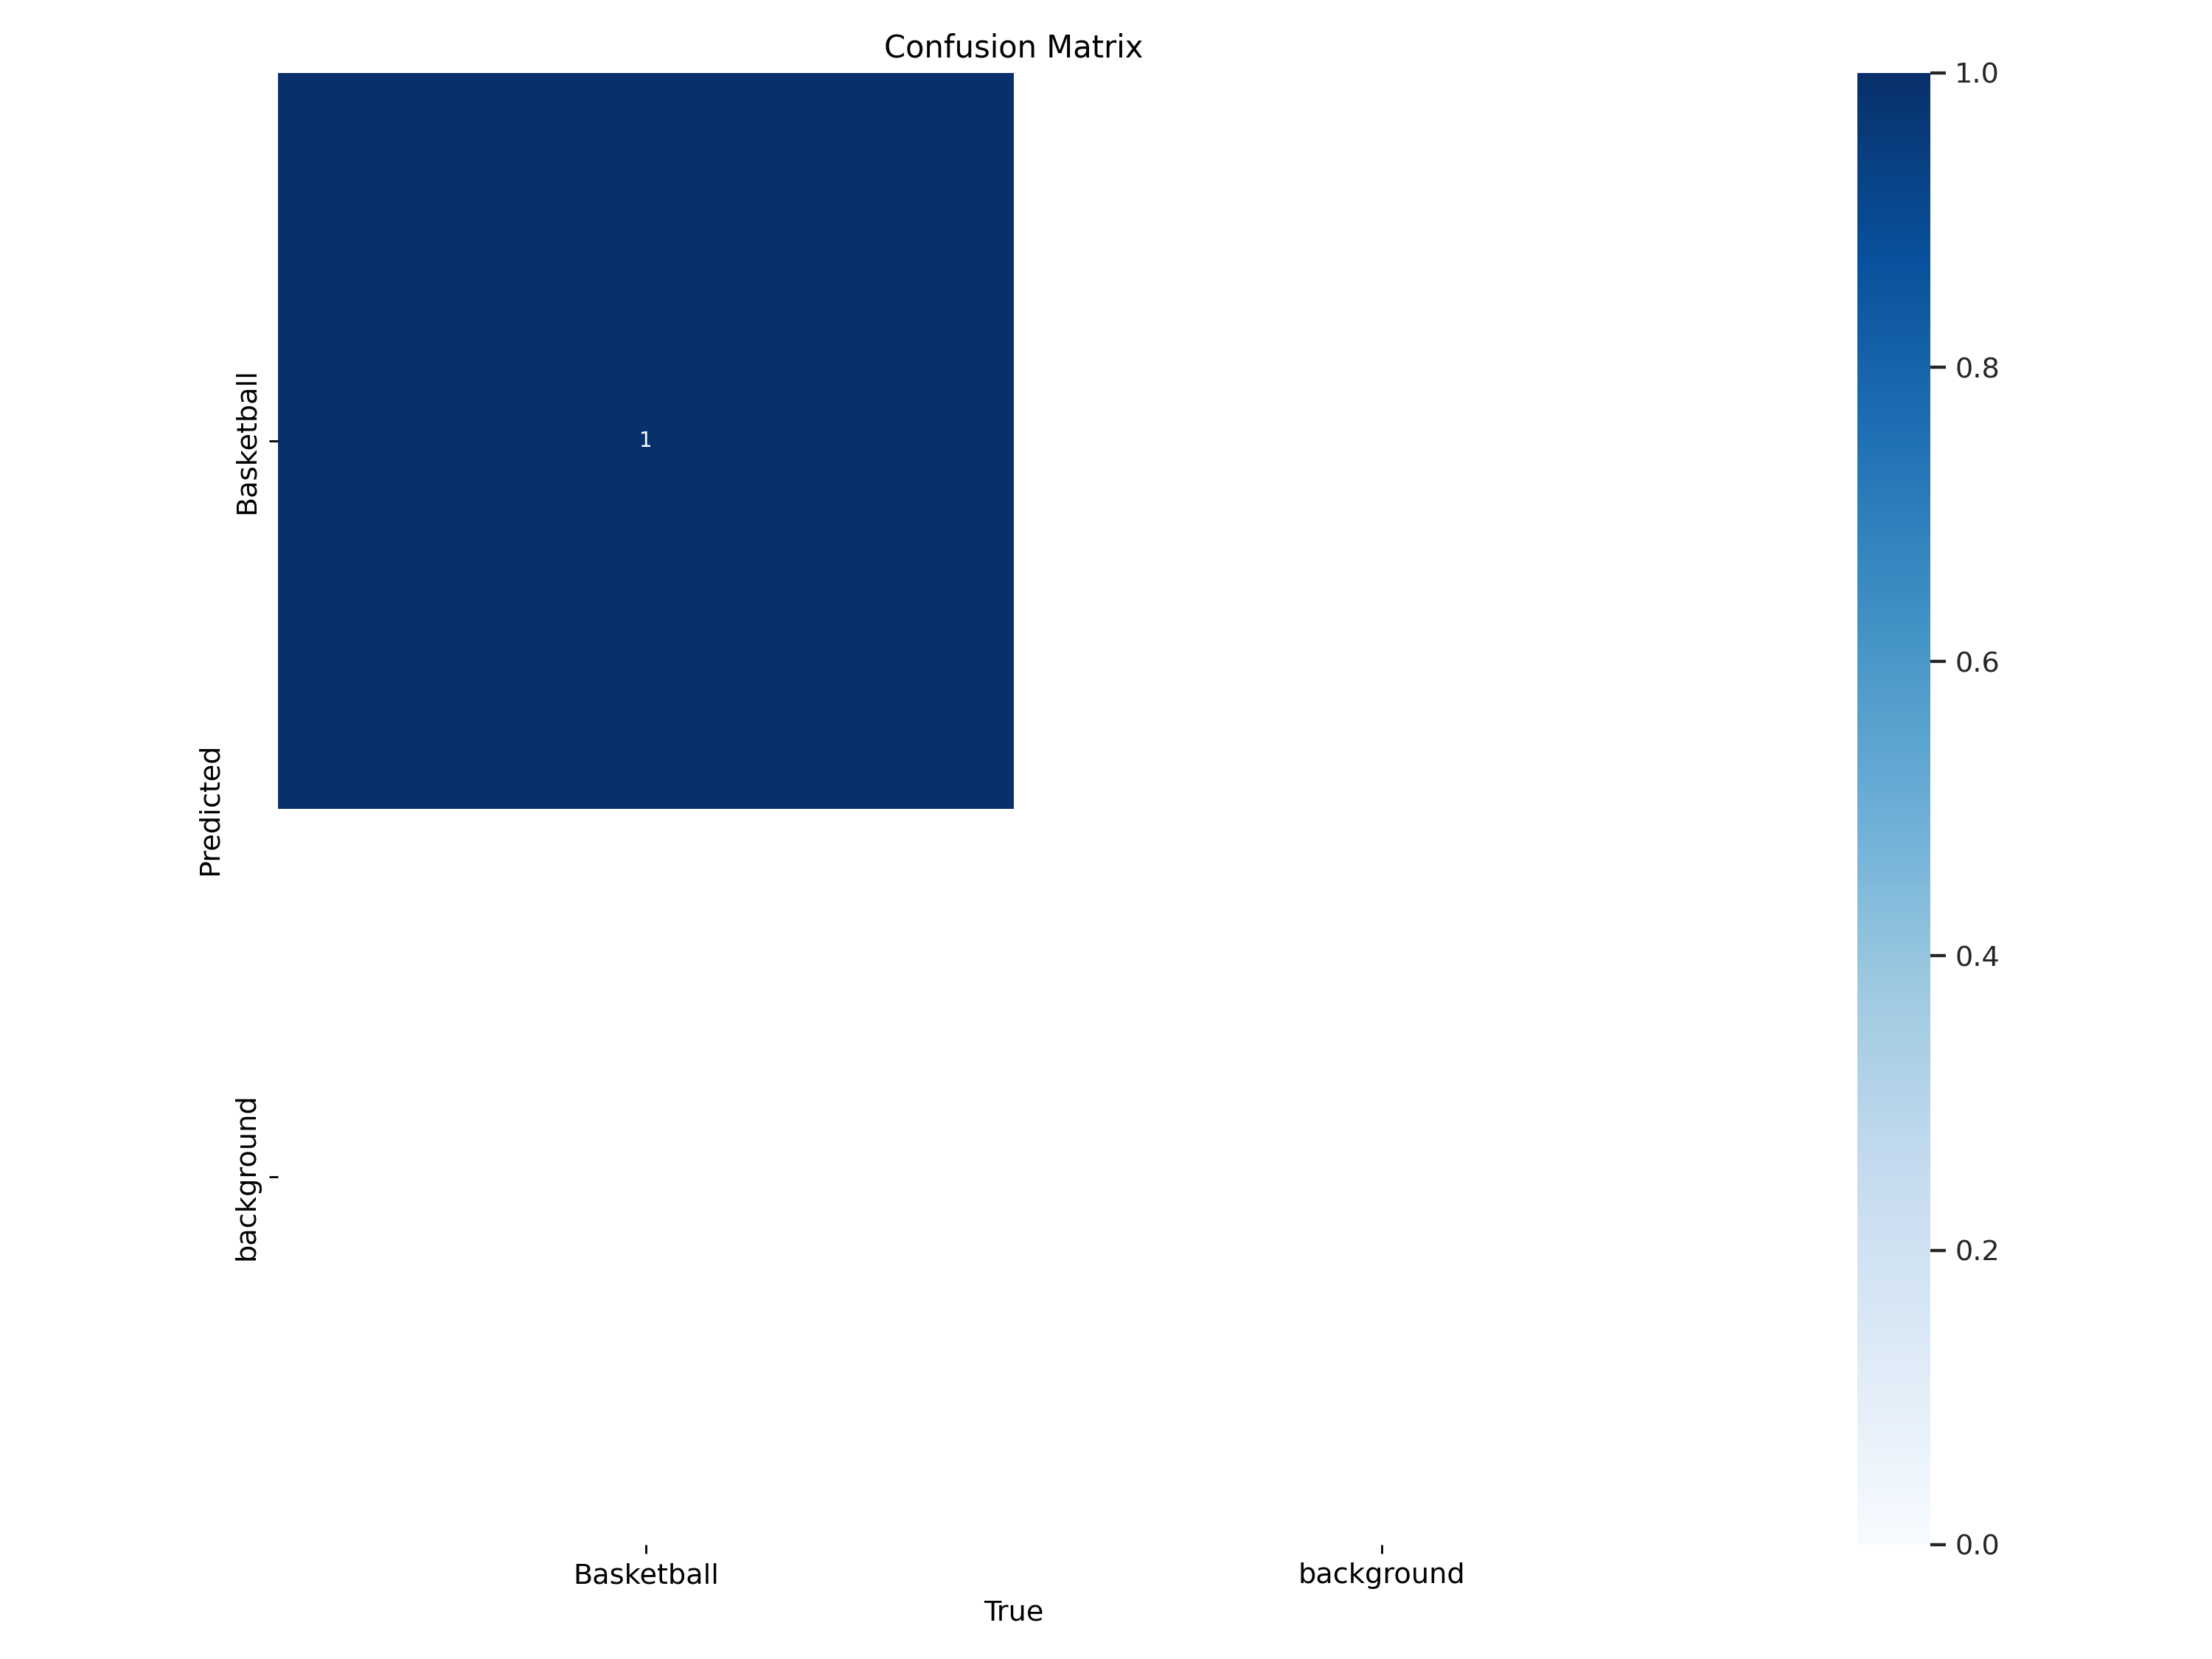

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

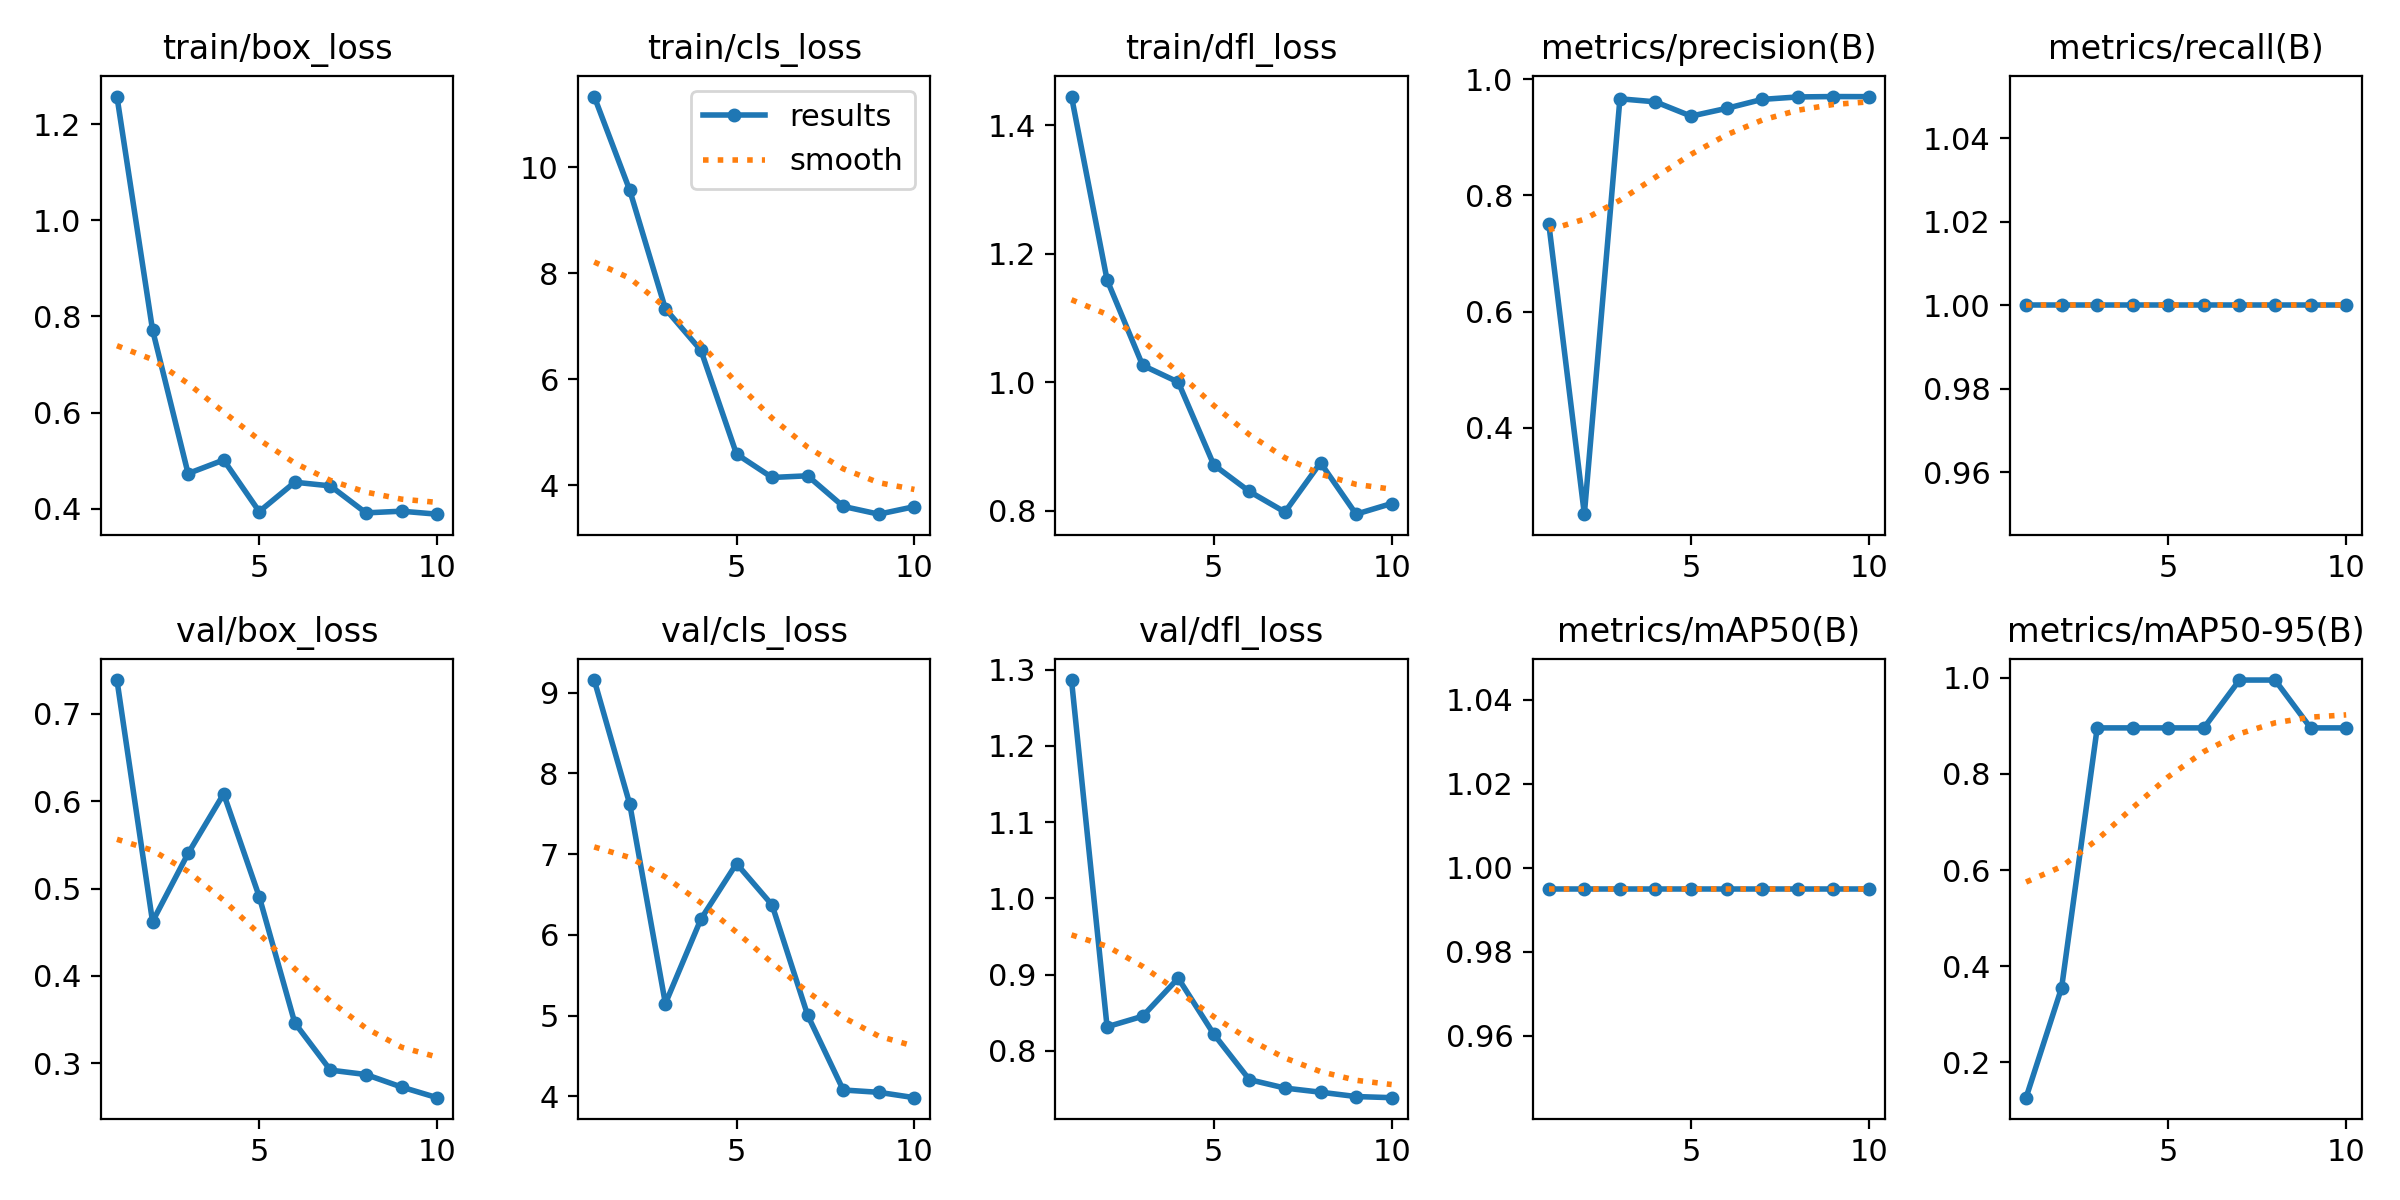

In [14]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

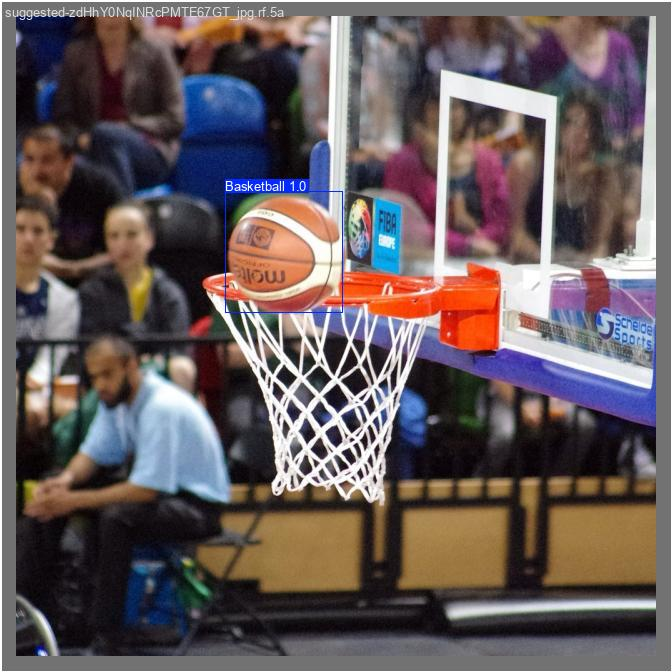

In [15]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [16]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Shot-Tracker-2/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.45it/s]
                   all          1          1      0.969          1      0.995      0.995
Speed: 9.3ms preprocess, 568.3ms inference, 0.0ms loss, 98.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [17]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [18]:
!pip install inference

Running inference on suggested-XWTvfDY1tLS473huZiKG_jpg.rf.e6aa4bff9f99c3b197c11a6d7d165961.jpg

0: 640x640 2 persons, 1 vase, 336.4ms
Speed: 10.0ms preprocess, 336.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


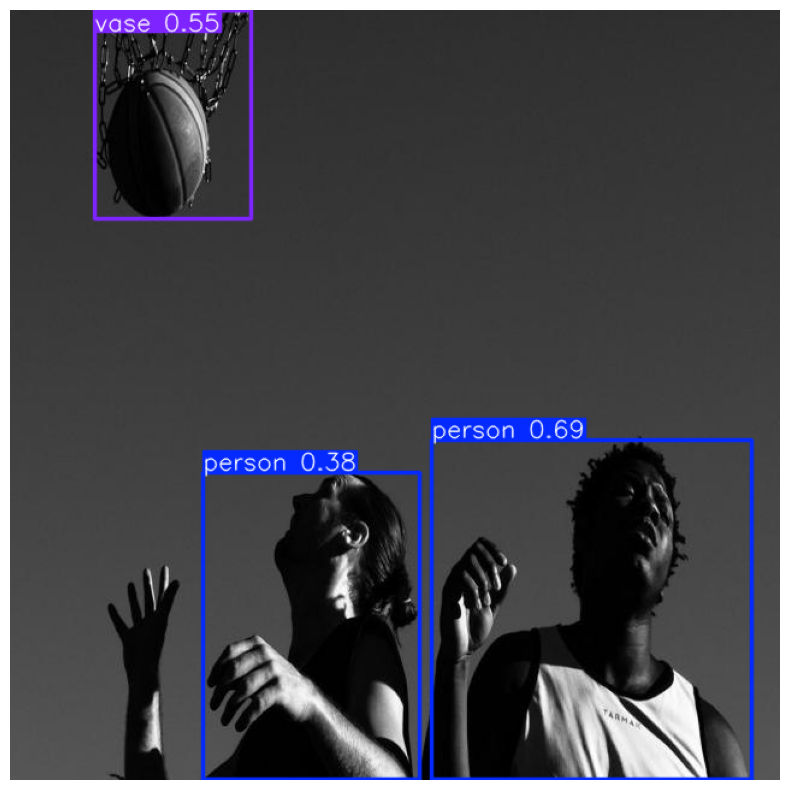

In [32]:
import os, random, cv2
import supervision as sv
import IPython
import inference
import matplotlib.pyplot as plt

# Location of test set images
test_set_loc = '/content/datasets/Shot-Tracker-2/test/images'
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))
    if image is None:
      continue

    print("Running inference on " + img_name)

    # Perform inference
    results = model(image)
    annotatedImage = results[0].plot()

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.axis("off")  # Hide axis for better visualization
    plt.show()

In [31]:
# Load the YOLO11 model

# Export the model to TFLite format
model.export(format="torchscript")

# Load the exported TFLite model
# tflite_model = YOLO("yolo11n_float32.tflite")

# Run inference
# results = tflite_model("https://ultralytics.com/images/bus.jpg")

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 3.4s, saved as 'yolo11n.torchscript' (10.5 MB)

Export complete (4.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolo11n.torchscript imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'yolo11n.torchscript'